## Clustering

[Clustering with Scikit Learn](http://physics.bu.edu/~pankajm/ML-Notebooks/HTML/NB15-CXII-clustering.html)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline

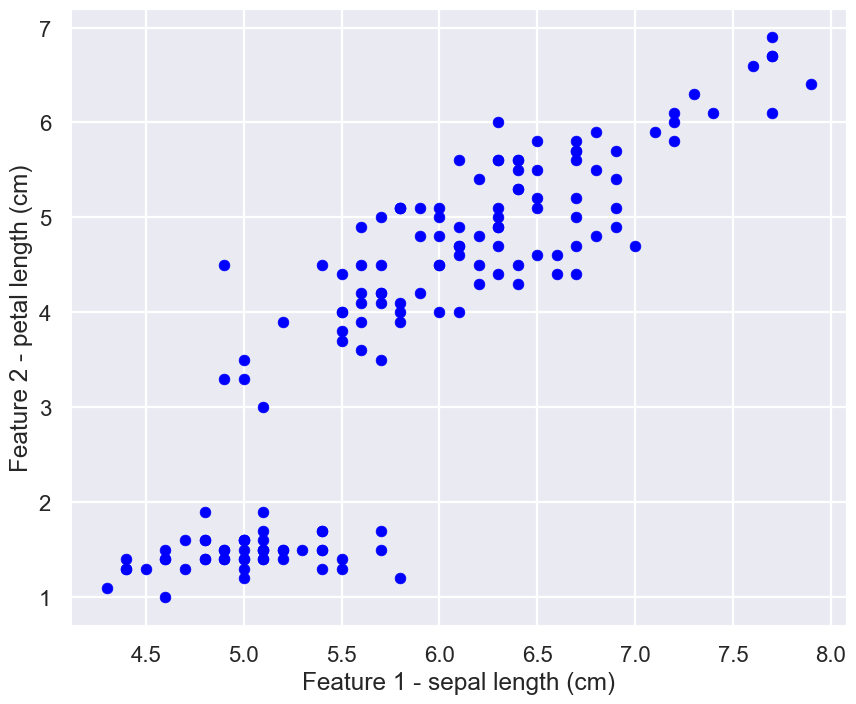

In [3]:
# import the iris data
iris = datasets.load_iris()
# let's just use two features, so that we can 
# easily visualize them
X = iris.data[:, [0, 2]]
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names
# get the classes
n_class = len(set(y))

# let's have a look of the data first
plt.figure(figsize = (10,8))

plt.scatter(X[:, 0], X[:, 1], \
            color = 'b', marker = 'o', s = 60)

plt.xlabel('Feature 1 - ' + feature_names[0])
plt.ylabel('Feature 2 - ' + feature_names[2])
plt.show()

In [4]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3, random_state = 0)
kmean.fit(X)

/Users/andresram1/.virtualenv/python3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

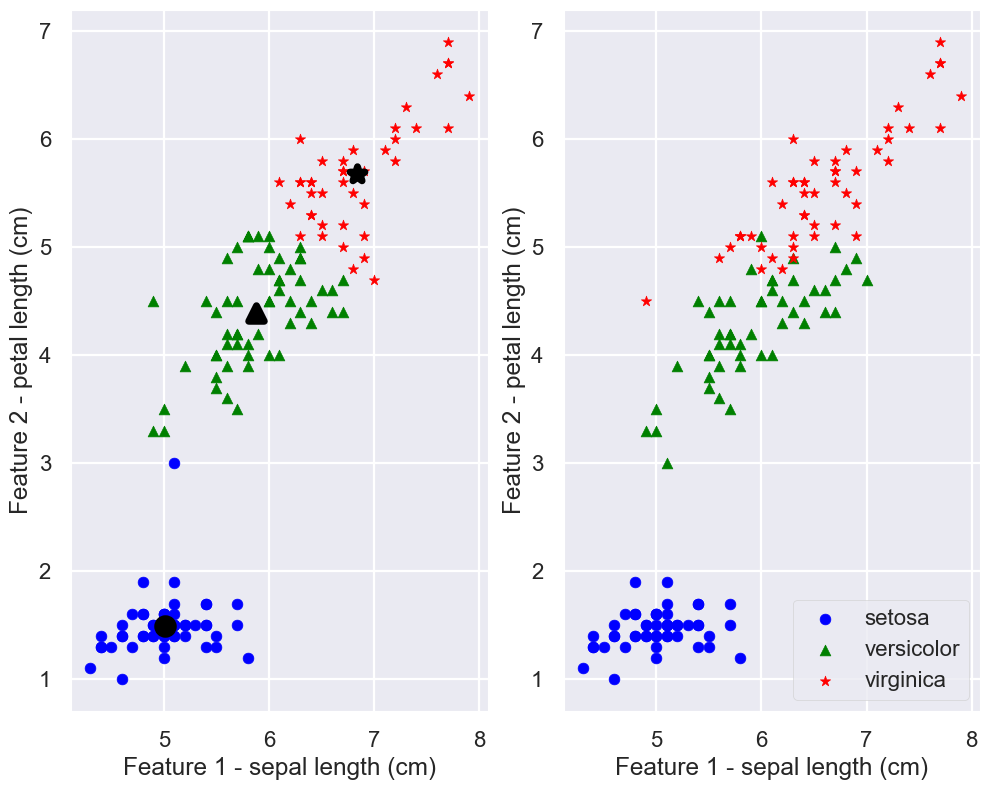

In [5]:
# let's have a look of the data first
colors = ['b', 'g', 'r']
symbols = ['o', '^', '*']
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for i, c, s in (zip(range(n_class), colors, symbols)):
    ix = kmean.labels_ == i
    ax.scatter(X[:, 0][ix], X[:, 1][ix], \
                color = c, marker = s, s = 60, \
                label = target_names[i])
    loc = kmean.cluster_centers_[i]
    ax.scatter(loc[0], loc[1], color = 'k', \
               marker = s, linewidth = 5)
    
    ix = y == i
    ax2.scatter(X[:, 0][ix], X[:, 1][ix], \
                color = c, marker = s, s = 60, \
                label = target_names[i])
    

plt.legend(loc = 4, scatterpoints = 1)
ax.set_xlabel('Feature 1 - ' + feature_names[0])
ax.set_ylabel('Feature 2 - ' + feature_names[2])
ax2.set_xlabel('Feature 1 - ' + feature_names[0])
ax2.set_ylabel('Feature 2 - ' + feature_names[2])
plt.tight_layout()
plt.show()

In [6]:
new_points = np.array([[5, 2], 
                      [6, 5]])
kmean.predict(new_points)

array([0, 1], dtype=int32)